# Purdue Krannert-Statistics ML and Causal Inference Boot Camp 
## Hands-On Use of Libraries Related to ML and Causal Inference

## Arman Sabbaghi and Yumin Zhang <br> Department of Statistics <br> Purdue University

## July 14, 2021


### Reading the Data

In [1]:
airbnb_data = read.csv("airbnb_data_sample_Purdue.csv", header=T)

head(airbnb_data)

airbnbhostid airbnbpropertyid city        superhost_period_all
1  98233442    15375322         Houston      7                  
2   6245550     1138514         Chicago     12                  
3  35870933    19825410         Dallas      12                  
4   5007980      929914         Chicago      5                  
5 110979112    16735163         Los Angeles 11                  
6  40161215     7810928         Chicago     10                  
  hostresponseaverage_pastyear available_days available_days_avelistedprice
1        NA                     72             90.61111                    
2  90.62500                     93             50.20430                    
3  99.35294                    185            339.05405                    
4  97.79592                    167            115.00000                    
5 100.00000                    192            182.93750                    
6 100.00000                     77             41.41559                    
  booked_days booked_days_aveprice listingtype     createddate zipcode bedrooms
1  3           89.00000            Entire home/apt 2016-10-04  77006   1       
2  0            0.00000            Entire home/apt 2013-05-04  60626   1       
3  2          350.00000            Entire home/apt 2017-07-10  75206   3       
4 22          115.00000            Entire home/apt 2013-02-07  60614   1       
5 84          164.64285            Entire home/apt 2017-01-10  90027   1       
6  9           45.11111            Entire home/apt 2017-06-14  60615   0       
  bathrooms instantbookenabled numberofreviews ratingoverall revenue
1 1.0       1                   14              99             267  
2 1.0       0                   23              90               0  
3 2.5       0                   17             100             700  
4 1.0       0                  150              98            2530  
5 1.0       0                   45             100           13830  
6 1.0       0                    9              91             406  
  reservations host_is_superhost_1_0
1  1           1                    
2  0           0                    
3  1           1                    
4  5           1                    
5 14           1                    
6  1           0

&#129300; What potential complications could exist in this dataset?

In [2]:
sum(is.na(airbnb_data))

[1] 123

For the purposes of today's discussion, we perform a *complete-case* analysis of the dataset.

In [3]:
airbnb_data = airbnb_data[complete.cases(airbnb_data),]

head(airbnb_data)

airbnbhostid airbnbpropertyid city        superhost_period_all
2   6245550     1138514         Chicago     12                  
3  35870933    19825410         Dallas      12                  
4   5007980      929914         Chicago      5                  
5 110979112    16735163         Los Angeles 11                  
6  40161215     7810928         Chicago     10                  
7   4981837     6886494         Los Angeles  5                  
  hostresponseaverage_pastyear available_days available_days_avelistedprice
2  90.62500                     93             50.20430                    
3  99.35294                    185            339.05405                    
4  97.79592                    167            115.00000                    
5 100.00000                    192            182.93750                    
6 100.00000                     77             41.41559                    
7 100.00000                    214            215.29439                    
  booked_days booked_days_aveprice listingtype     createddate zipcode bedrooms
2  0            0.00000            Entire home/apt 2013-05-04  60626   1       
3  2          350.00000            Entire home/apt 2017-07-10  75206   3       
4 22          115.00000            Entire home/apt 2013-02-07  60614   1       
5 84          164.64285            Entire home/apt 2017-01-10  90027   1       
6  9           45.11111            Entire home/apt 2017-06-14  60615   0       
7 32          224.59375            Entire home/apt 2015-06-16  90025   2       
  bathrooms instantbookenabled numberofreviews ratingoverall revenue
2 1.0       0                   23              90               0  
3 2.5       0                   17             100             700  
4 1.0       0                  150              98            2530  
5 1.0       0                   45             100           13830  
6 1.0       0                    9              91             406  
7 2.0       1                   27              97            7187  
  reservations host_is_superhost_1_0
2  0           0                    
3  1           1                    
4  5           1                    
5 14           1                    
6  1           0                    
7  5           1

### The Science

<b> Experimental Units </b> 

There are two possible types of experimental units.

- Airbnb host, denoted by "airbnbhostid".

- Property, denoted by "airbnbpropertyid".

These two types of experimental units can have distinct treatments that can be applied to them.

&#129300; In the original dataset, is the "no-interference" assumption in SUTVA satisifed in this dataset? Why or why not?

In [4]:
table(factor(airbnb_data$airbnbhostid))


       59      2153      2339      2787      2798      3144      3647      3768 
        1         1         1         4         2         1         2         3 
     3908      4396      4434      4528      4617      4645      4746      4869 
        2         1         3         1         1         1         2         1 
     5061      5143      5159      5556      5803      5850      6041      6527 
        3         1         4         2         3         3         1         1 
     7086      7351      7626      7629      7815      7859      7989      7999 
        1         1         2         1         1         2         1         5 
     9171      9276      9744     10386     10535     10569     12022     15523 
        1         1         1         1         1         4         1         1 
    15991     16800     16851     17519     18837     18958     19779     19793 
        1         1         1         2         3         2         1         1 
    20282     20834     223

In [5]:
table(factor(airbnb_data$airbnbpropertyid))


    3192     3662     3663     3831     4002     4197     4529     5270 
       1        1        1        1        1        2        1        2 
    5441     5589     5728     5739     6848     7273     7992    10730 
       1        1        1        1        1        3        1        1 
   10766    10962    11785    11900    12356    12382    12579    12937 
       1        1        2        1        1        1        2        1 
   13488    13824    14066    14218    14374    16684    16974    17747 
       1        1        1        2        1        1        1        1 
   18150    18243    19169    19887    20000    20299    20472    20793 
       1        1        1        1        1        1        1        2 
   21218    22453    23269    23545    23637    23894    24134    24349 
       2        1        1        1        1        1        1        1 
   24372    25354    25366    25672    26362    26409    26520    26785 
       1        1        1        1        1      

To remove the potential violation of the no-interference assumption in SUTVA (so as to simplify our analyses today), we consider one observation per experimental unit.

&#9888; Causal inference is *not* impossible when interference exists! It just becomes more difficult. As our focus is on machine learning for causal inference, we will consider studies in which SUTVA is satisfied. 

In [6]:
airbnb_data_host = airbnb_data[1,]
for(i in 1:length(unique(airbnb_data$airbnbhostid)))
{
    selected_rows = (1:nrow(airbnb_data))[airbnb_data$airbnbhostid==unique(airbnb_data$airbnbhostid)[i]]
    particular_row = selected_rows[1]
    airbnb_data_host = rbind(airbnb_data_host, airbnb_data[particular_row,])
}
airbnb_data_host = airbnb_data_host[-1,] 

head(airbnb_data_host)

airbnbhostid airbnbpropertyid city        superhost_period_all
21   6245550     1138514         Chicago     12                  
3   35870933    19825410         Dallas      12                  
4    5007980      929914         Chicago      5                  
5  110979112    16735163         Los Angeles 11                  
6   40161215     7810928         Chicago     10                  
7    4981837     6886494         Los Angeles  5                  
   hostresponseaverage_pastyear available_days available_days_avelistedprice
21  90.62500                     93             50.20430                    
3   99.35294                    185            339.05405                    
4   97.79592                    167            115.00000                    
5  100.00000                    192            182.93750                    
6  100.00000                     77             41.41559                    
7  100.00000                    214            215.29439                    
   booked_days booked_days_aveprice listingtype     createddate zipcode
21  0            0.00000            Entire home/apt 2013-05-04  60626  
3   2          350.00000            Entire home/apt 2017-07-10  75206  
4  22          115.00000            Entire home/apt 2013-02-07  60614  
5  84          164.64285            Entire home/apt 2017-01-10  90027  
6   9           45.11111            Entire home/apt 2017-06-14  60615  
7  32          224.59375            Entire home/apt 2015-06-16  90025  
   bedrooms bathrooms instantbookenabled numberofreviews ratingoverall revenue
21 1        1.0       0                   23              90               0  
3  3        2.5       0                   17             100             700  
4  1        1.0       0                  150              98            2530  
5  1        1.0       0                   45             100           13830  
6  0        1.0       0                    9              91             406  
7  2        2.0       1                   27              97            7187  
   reservations host_is_superhost_1_0
21  0           0                    
3   1           1                    
4   5           1                    
5  14           1                    
6   1           0                    
7   5           1

In [7]:
airbnb_data_property = airbnb_data[1,]
for(i in 1:length(unique(airbnb_data$airbnbpropertyid)))
{
    selected_rows = (1:nrow(airbnb_data))[airbnb_data$airbnbpropertyid==unique(airbnb_data$airbnbpropertyid)[i]]
    particular_row = selected_rows[1]
    airbnb_data_property = rbind(airbnb_data_property, airbnb_data[particular_row,])
}
airbnb_data_property = airbnb_data_property[-1,] 

head(airbnb_data_property)

airbnbhostid airbnbpropertyid city        superhost_period_all
21   6245550     1138514         Chicago     12                  
3   35870933    19825410         Dallas      12                  
4    5007980      929914         Chicago      5                  
5  110979112    16735163         Los Angeles 11                  
6   40161215     7810928         Chicago     10                  
7    4981837     6886494         Los Angeles  5                  
   hostresponseaverage_pastyear available_days available_days_avelistedprice
21  90.62500                     93             50.20430                    
3   99.35294                    185            339.05405                    
4   97.79592                    167            115.00000                    
5  100.00000                    192            182.93750                    
6  100.00000                     77             41.41559                    
7  100.00000                    214            215.29439                    
   booked_days booked_days_aveprice listingtype     createddate zipcode
21  0            0.00000            Entire home/apt 2013-05-04  60626  
3   2          350.00000            Entire home/apt 2017-07-10  75206  
4  22          115.00000            Entire home/apt 2013-02-07  60614  
5  84          164.64285            Entire home/apt 2017-01-10  90027  
6   9           45.11111            Entire home/apt 2017-06-14  60615  
7  32          224.59375            Entire home/apt 2015-06-16  90025  
   bedrooms bathrooms instantbookenabled numberofreviews ratingoverall revenue
21 1        1.0       0                   23              90               0  
3  3        2.5       0                   17             100             700  
4  1        1.0       0                  150              98            2530  
5  1        1.0       0                   45             100           13830  
6  0        1.0       0                    9              91             406  
7  2        2.0       1                   27              97            7187  
   reservations host_is_superhost_1_0
21  0           0                    
3   1           1                    
4   5           1                    
5  14           1                    
6   1           0                    
7   5           1

<b> Treatment Factors </b>

For the case in which the Airbnb hosts are taken as the experimental units, the treatment factor of interest is superhost status, denoted by "host_is_superhost_1_0".

For the case in which properties are taken as the experimental units, the treatment factor of interest is whether the "instant bookable" feature is enabled, denoted by "instantbookenabled".

&#129300; Could there be hidden varieties in the treatment levels?


<b> Potential Outcome </b>

There are three types of potential outcomes that we are considering for this dataset.

- Number of reservations, denoted by "reservations".

- Revenue, denoted by "revenue"

- Booked days, denoted by "booked_days".


<b> Covariates </b>

Covariates are background characteristics of the experimental units observed prior to treatment assignment, or variables observed after treatment assignment that are known to *not* be affected by treatment.


<b> Assignment Mechanism </b>

This is an observational dataset, and so the assignment mechanism is unknown.

&#129300; Could the individualistic, probabilistic, and unconfoundedness assumptions hold true for this dataset?

### Visualizing Covariate Distributions Across Treatment and Control Groups

Warning message:
"package 'vioplot' was built under R version 4.0.5"
Loading required package: sm

Warning message:
"package 'sm' was built under R version 4.0.5"
Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.0.5"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




[1] "hostresponseaverage_pastyear : 99.0408851465662 , 98.1513407227959 , 3.50519058818312e-104"


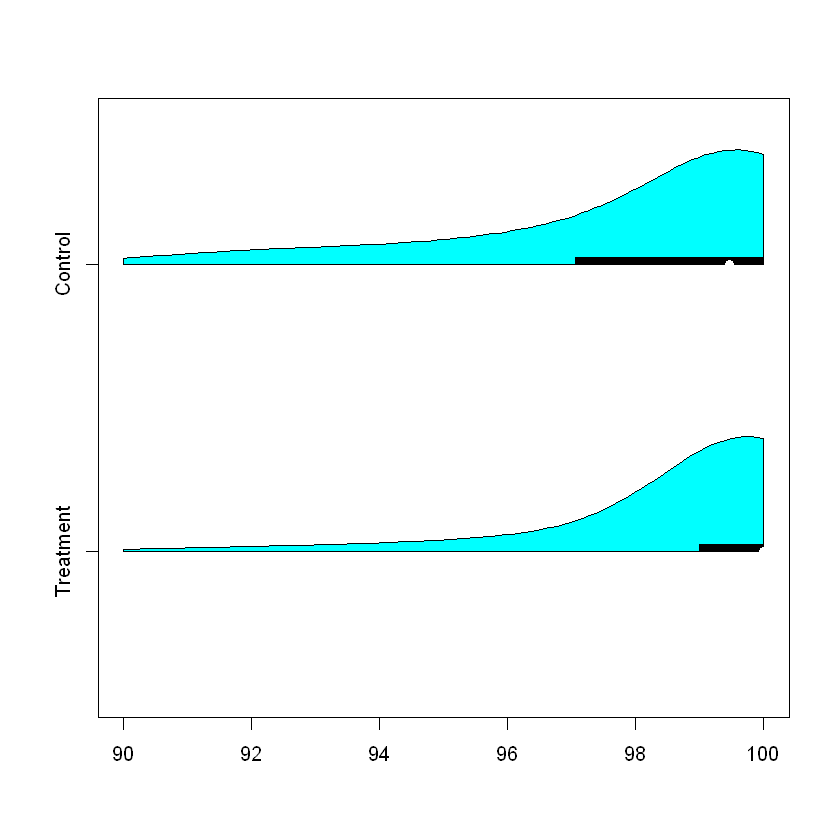

[1] "available_days_avelistedprice : 117.242275438774 , 133.97813767708 , 1.31836928711608e-13"


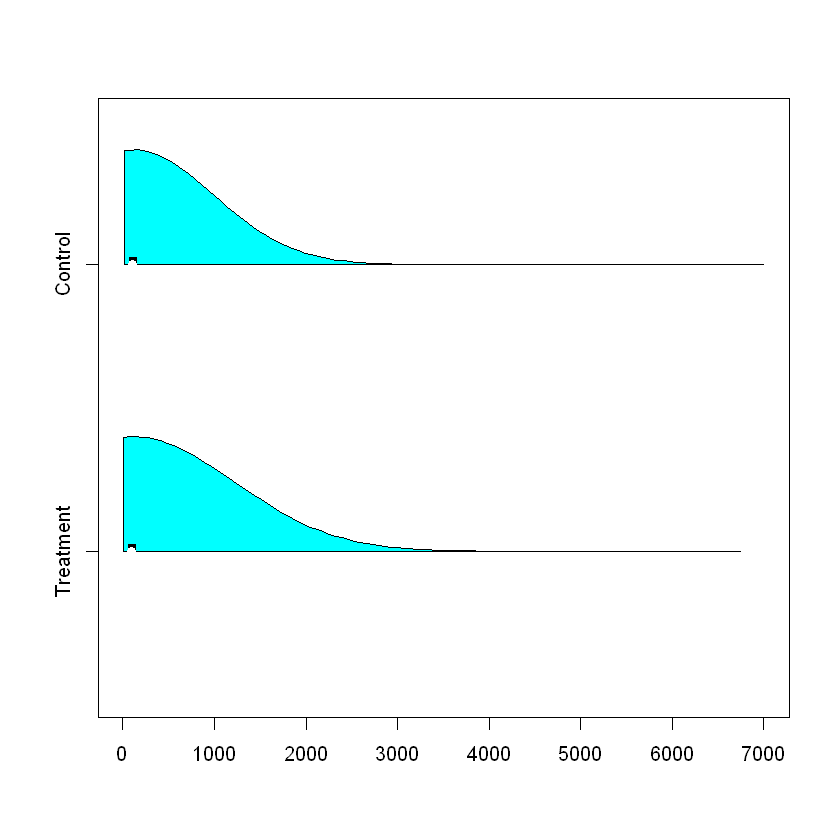

In [8]:
#install.packages("vioplot")
library(vioplot)

numerical_covariate_balance = function(treated, control, covariate_name)
{
  mean_t = mean(treated)
  mean_c = mean(control)
  
  var_t = var(treated)
  var_c = var(control)
  pooled_var = (var_t*(length(treated)-1) + var_c*(length(control)-1))/(length(treated)+length(control)-2)
  standard_err = (pooled_var*(1/length(treated) + 1/length(control)))^0.5
  
  degrees_of_freedom = length(treated) + length(control) - 2
  
  test_statistic = (mean_t - mean_c)/(standard_err)
  
  p_value = 2*min(pt(test_statistic, df=degrees_of_freedom, lower.tail=TRUE), 
                  pt(test_statistic, df=degrees_of_freedom, lower.tail=FALSE))

  vioplot(treated, control, names=c("Treatment", "Control"), col="cyan", horizontal=TRUE, side="right")

  print(paste(covariate_name,":", mean_t, ",", mean_c, ",", p_value))
}

numerical_covariate_balance(airbnb_data_host$hostresponseaverage_pastyear[airbnb_data_host$host_is_superhost_1_0==1], 
                            airbnb_data_host$hostresponseaverage_pastyear[airbnb_data_host$host_is_superhost_1_0==0], 
                            "hostresponseaverage_pastyear")

numerical_covariate_balance(airbnb_data_property$available_days_avelistedprice[airbnb_data_property$instantbookenabled==1], 
                            airbnb_data_property$available_days_avelistedprice[airbnb_data_property$instantbookenabled==0], 
                            "available_days_avelistedprice")

### Propensity Score Matching

In [9]:
#install.packages("Matching")

library(Matching)

propensity_score_model = glm(instantbookenabled~available_days_avelistedprice+booked_days_aveprice+listingtype,
                             data=airbnb_data_property,
                             family="binomial")

propensity_score_estimates = propensity_score_model$fitted
observed_outcomes = airbnb_data_property$booked_days
treatment = airbnb_data_property$instantbookenabled

matched_dataset = Match(Y=observed_outcomes, X=propensity_score_estimates, Tr=treatment, M=1)
summary(matched_dataset)

matched_dataset_matrix = rbind(airbnb_data_property[matched_dataset$index.treated,], 
                               airbnb_data_property[matched_dataset$index.control,])

head(matched_dataset_matrix)
tail(matched_dataset_matrix)

Warning message:
"package 'Matching' was built under R version 4.0.5"
Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:sm':

    muscle


## 
##  Matching (Version 4.9-9, Build Date: 2021-03-15)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Estimate...  7.2796 
AI SE......  0.36702 
T-stat.....  19.834 
p.val......  < 2.22e-16 

Original number of observations..............  16173 
Original number of treated obs...............  6378 
Matched number of observations...............  6378 
Matched number of observations  (unweighted).  296185 



airbnbhostid airbnbpropertyid city        superhost_period_all
7   4981837      6886494          Los Angeles 5                   
7.1 4981837      6886494          Los Angeles 5                   
7.2 4981837      6886494          Los Angeles 5                   
7.3 4981837      6886494          Los Angeles 5                   
7.4 4981837      6886494          Los Angeles 5                   
7.5 4981837      6886494          Los Angeles 5                   
    hostresponseaverage_pastyear available_days available_days_avelistedprice
7   100                          214            215.2944                     
7.1 100                          214            215.2944                     
7.2 100                          214            215.2944                     
7.3 100                          214            215.2944                     
7.4 100                          214            215.2944                     
7.5 100                          214            215.2944                     
    booked_days booked_days_aveprice listingtype     createddate zipcode
7   32          224.5938             Entire home/apt 2015-06-16  90025  
7.1 32          224.5938             Entire home/apt 2015-06-16  90025  
7.2 32          224.5938             Entire home/apt 2015-06-16  90025  
7.3 32          224.5938             Entire home/apt 2015-06-16  90025  
7.4 32          224.5938             Entire home/apt 2015-06-16  90025  
7.5 32          224.5938             Entire home/apt 2015-06-16  90025  
    bedrooms bathrooms instantbookenabled numberofreviews ratingoverall revenue
7   2        2         1                  27              97            7187   
7.1 2        2         1                  27              97            7187   
7.2 2        2         1                  27              97            7187   
7.3 2        2         1                  27              97            7187   
7.4 2        2         1                  27              97            7187   
7.5 2        2         1                  27              97            7187   
    reservations host_is_superhost_1_0
7   5            1                    
7.1 5            1                    
7.2 5            1                    
7.3 5            1                    
7.4 5            1                    
7.5 5            1

airbnbhostid airbnbpropertyid city       superhost_period_all
17190.59     6527        5589          Washington 10                  
17520.63  7150544     8741053          New York    8                  
17695.58 21725994     6332130          New York    6                  
17851.63  5585945     1073832          New York    7                  
18025.60 32052000     6179073          New York    6                  
18229.63 44620317     8761292          New York   11                  
         hostresponseaverage_pastyear available_days
17190.59 100.00000                    104           
17520.63  98.22222                    187           
17695.58 100.00000                    183           
17851.63  94.25806                    168           
18025.60  98.86207                     81           
18229.63 100.00000                    133           
         available_days_avelistedprice booked_days booked_days_aveprice
17190.59 103.58654                     25          104.96000           
17520.63 100.00000                     23          100.00000           
17695.58 100.06011                     21          100.00000           
17851.63 100.00000                     85          100.00000           
18025.60  44.64198                     34           44.88235           
18229.63  38.83459                     29           36.65517           
         listingtype     createddate zipcode bedrooms bathrooms
17190.59 Entire home/apt 2009-02-25  20009   1        1        
17520.63 Entire home/apt 2015-10-04  11231   0        1        
17695.58 Entire home/apt 2015-05-08  11226   1        1        
17851.63 Entire home/apt 2013-04-12  11231   0        1        
18025.60 Private room    2015-04-26  11235   1        1        
18229.63 Private room    2015-10-05  11368   1        1        
         instantbookenabled numberofreviews ratingoverall revenue reservations
17190.59 0                  65              89            2624    11          
17520.63 0                  56              90            2300     5          
17695.58 0                  27              96            2100     7          
17851.63 0                  95              94            8500    16          
18025.60 0                  67              96            1526     5          
18229.63 0                  32              95            1063     1          
         host_is_superhost_1_0
17190.59 1                    
17520.63 0                    
17695.58 0                    
17851.63 0                    
18025.60 1                    
18229.63 0

In [10]:
matched_dataset_balance = MatchBalance(instantbookenabled~available_days_avelistedprice+booked_days_aveprice+listingtype,
                                       data=airbnb_data_property,                                      
                                       match.out=matched_dataset,                                      
                                       nboots=10)


***** (V1) available_days_avelistedprice *****
                       Before Matching 	 	 After Matching
mean treatment........     117.24 	 	     117.24 
mean control..........     133.98 	 	     116.41 
std mean diff.........    -13.636 	 	    0.67823 

mean raw eQQ diff.....     16.768 	 	     2.5298 
med  raw eQQ diff.....     8.8394 	 	     2.0717 
max  raw eQQ diff.....     1859.1 	 	     3931.2 

mean eCDF diff........   0.044093 	 	   0.014629 
med  eCDF diff........   0.045298 	 	   0.011949 
max  eCDF diff........   0.071516 	 	    0.03539 

var ratio (Tr/Co).....    0.66295 	 	     1.3092 
T-test p-value........ 1.1102e-14 	 	     0.5233 
KS Bootstrap p-value.. < 2.22e-16 	 	 < 2.22e-16 
KS Naive p-value...... < 2.22e-16 	 	 < 2.22e-16 
KS Statistic..........   0.071516 	 	    0.03539 


***** (V2) booked_days_aveprice *****
                       Before Matching 	 	 After Matching
mean treatment........     112.15 	 	     112.15 
mean control..........     115.03 	 	     1

### Analyzing the Airbnb Data using the grf Package in R

#### Original Dataset

In [ ]:
#install.packages("grf")
library(grf)

set.seed(1)

fit_grf = causal_forest(
  X = airbnb_data_property[, c('available_days_avelistedprice', 'booked_days_aveprice', 'bedrooms', 'bathrooms')], 
  Y = airbnb_data_property$booked_days, 
  W = airbnb_data_property$instantbookenabled,
  num.trees = 2000, 
  num.threads = 1
)

fit_grf_ATE = average_treatment_effect(fit_grf, target.sample = 'all')
# target.sample = c("all", "treated", "control", "overlap")
fit_grf_ATE

fit_grf_ITE = predict(fit_grf, estimate.variance = TRUE)
summary(fit_grf_ITE)

#format(object.size(fit_grf), units = 'Mb')

#### Designed Dataset

In [ ]:
set.seed(1)

fit_grf = causal_forest(
  X = matched_dataset_matrix[, c('available_days_avelistedprice', 'booked_days_aveprice', 'bedrooms', 'bathrooms')], 
  Y = matched_dataset_matrix$booked_days, 
  W = matched_dataset_matrix$instantbookenabled,
  num.trees = 2000, 
  num.threads = 1
)

fit_grf_ATE = average_treatment_effect(fit_grf, target.sample = 'all')
# target.sample = c("all", "treated", "control", "overlap")
fit_grf_ATE

fit_grf_ITE = predict(fit_grf, estimate.variance = TRUE)
summary(fit_grf_ITE)

#format(object.size(fit_grf), units = 'Mb')

### Analyzing the Airbnb Data using the bcf Package in R

#### Original Dataset

In [ ]:
install.packages("bcf")
library(bcf)

set.seed(1)


fit_bcf = bcf(
  y = airbnb_data_property$booked_days, 
  z = airbnb_data_property$instantbookenabled, 
  x_control = as.matrix(airbnb_data_property[, c('available_days_avelistedprice', 'booked_days_aveprice', 'bedrooms', 'bathrooms')]), 
  x_moderate = as.matrix(airbnb_data_property[, c('available_days_avelistedprice', 'booked_days_aveprice', 'bedrooms', 'bathrooms')]),
  pihat = propensity_score_model$fitted, 
  include_pi = 'both', 
  nburn = 2000,
  nsim = 2000
)

fit_bcf_ATE = mean(fit_bcf_ITE)
fit_bcf_ATE

fit_bcf_ITE = colMeans(fit_bcf$tau)
summary(fit_bcf_ITE)

#format(object.size(fit_bcf), units = 'Mb')

#### Designed Dataset

In [ ]:
set.seed(1)

fit_grf = causal_forest(
  X = matched_dataset_matrix[, c('available_days_avelistedprice', 'booked_days_aveprice', 'bedrooms', 'bathrooms')], 
  Y = matched_dataset_matrix$booked_days, 
  W = matched_dataset_matrix$instantbookenabled,
  num.trees = 2000, 
  num.threads = 1
)

fit_grf_ATE = average_treatment_effect(fit_grf, target.sample = 'all')
# target.sample = c("all", "treated", "control", "overlap")
fit_grf_ATE

fit_grf_ITE = predict(fit_grf, estimate.variance = TRUE)
summary(fit_grf_ITE)

#format(object.size(fit_grf), units = 'Mb')

### References

Cochran W.G. (1965). The planning of observational studies of human populations. *Journal of the Royal Statistical Society: Series A*, 128(2), 234-255.

Cochran W.G. (1968). The effectiveness of adjustment by subclassification in removing bias in observational studies. *Biometrics*, 24(2), 295-313.

Dehejia R.V. and Wahba S. (1999). Causal effects in nonexperimental studies: Reevaluating the evaluation of training programs. *Journal of the American Statistical Association* 94(448), 1053-1062.

Efron B. (1979). Bootstrap methods: Another look at the jackknife. *Annals of Statistics* 7(1), 1-26.

Freedman D.A. (2006). Statistical models for causation: What inferential leverage do they provide? *Evaluation Review* 30(6), 691-713.

Freedman D.A. (2008). On regression adjustments to experimental data. *Advances in Applied Mathematics* 40(2), 180-193.

Freedman D.A. (2009). *Statistical Models: Theory and Practice*, Cambridge University Press (2nd edition).

Garcia-Horton V. (2015). *Topics in Bayesian Inference for Causal Effects*. Harvard University Doctoral Dissertation.

Gelman A. and Pardoe I. (2007). Average predictive comparisons for models with nonlinearity, interactions, and variance components. *Sociological Methodology*, 37(1), 23-51.

Holland P.W. (1986). Statistics and causal inference. *Journal of the American Statistical Association* 81(396), 945-960.

Imbens G.W. and D.B. Rubin (2015). *Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction*, Cambridge University Press (1st edition).

K&uuml;nzel S.R., Sekhon J.S., Bickel P.J., Yu B. (2019). Metalearners for estimating heterogeneous treatment effects using machine learning. *Proceedings of the National Academy of Sciences of the United States of America* 116(10), 4156–4165.

LaLonde R.J. (1986). Evaluating the econometric evaluations of training programs with experimental data. *The American Economic Review* 76(4), 604-620.

Little R.J.A. and Rubin D.B. (2002). *Statistical Analysis With Missing Data*. Wiley-Interscience (2nd edition).  

Lu M., Sadiq S., Feaster D.J., Ishwaran H. (2018). Estimating individual treatment effect in observational data Using random forest methods. *Journal of Computational and Graphical Statistics* 27(1), 209-219.

Pearl, J. (2009) *Causality*, Cambridge University Press (2nd edition).

Rubin D.B. (1973). Matching to remove bias in observational studies. *Biometrics*, 29(1), 159-183.